In [1]:
%matplotlib inline

import regex
import pandas as pd
import numpy as np
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [3]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [4]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [5]:
import re
parsedData = []
data = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'WhatsApp Chat with Boys only.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [6]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])

,Date,Time,Author,Message
34767,2021-01-11,12:22 PM,IT Ldrp Dhruv,Hu kau ee ke
34768,2021-01-11,12:22 PM,IT Ldrp Dhruv,Download kari chodu
34769,2021-01-11,12:22 PM,IT Ldrp Dhruv,Session 3
34770,2021-01-11,12:22 PM,IT Ldrp Dhruv,Bhsod
34771,2021-01-11,12:25 PM,Arkesh,24 ball baki i think match is still on
34772,2021-01-11,12:25 PM,manthanbutani,Chal chal have kai nai
34773,2021-01-11,12:25 PM,manthanbutani,Kuch bhi
34774,2021-01-11,12:26 PM,Arkesh,Je atyare chale che ne bane side the pacers ee...
34775,2021-01-11,12:26 PM,manthanbutani,E j
34776,2021-01-11,12:26 PM,manthanbutani,😂


In [8]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
total_messages = df.shape[0]
print(media_messages)
def split_count(text):

    
    data = regex.findall(r'\X', text)
    
df["emoji"] = df["Message"].apply(split_count)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Messages:",total_messages)
print("Media:",media_messages)
print("Links:",links)

2759
Data science Community
Messages: 34787
Media: 2759
Links: 216


There are 626551 words in all the messages.


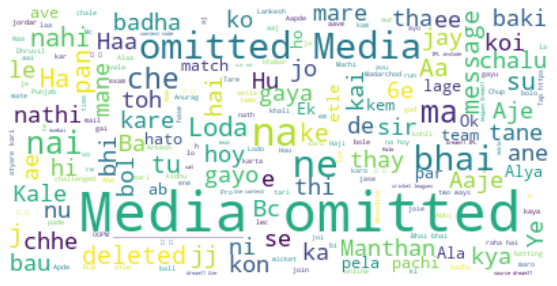

In [9]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Dhruvil Rathod


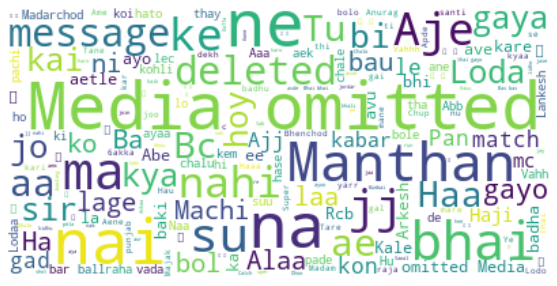

Author name IT LDRP OM MISHRA


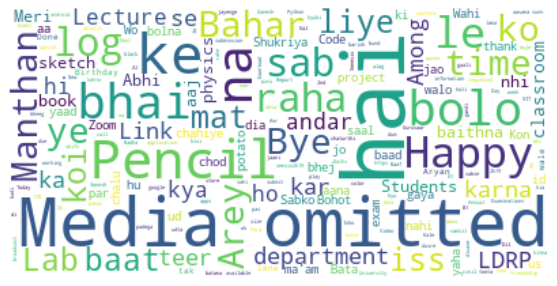

Author name manthanbutani


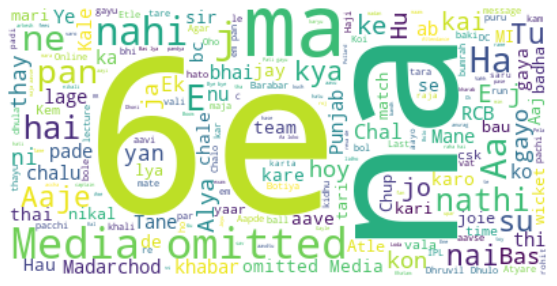

In [10]:
l = ["Dhruvil Rathod", "IT LDRP OM MISHRA", "manthanbutani"]
for i in range(len(l)):
  dummy_df = df[df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [11]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Dhruvil Rathod", "Anurag", "manthanbutani"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32028 entries, 0 to 34786
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      32028 non-null  datetime64[ns]
 1   Time      32028 non-null  object        
 2   Author    31746 non-null  object        
 3   Message   32028 non-null  object        
 4   emoji     0 non-null      object        
 5   urlcount  32028 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.7+ MB
Stats of Dhruvil Rathod -
Messages Sent 9721
Words per message 2.8555704145664027
Media Messages Sent 315
Links Sent 2

Stats of Anurag -
Messages Sent 1714
Words per message 4.000583430571762
Media Messages Sent 69
Links Sent 0

Stats of manthanbutani -
Messages Sent 4222
Words per message 2.6077688299384176
Media Messages Sent 131
Links Sent 0

